<Center> <h1> Classification of Fashion-MNIST dataset </h1> </center>

### Introduction

- Dataset 
    - In this project, we analyze the Fashion-MNIST dataset, which consists of grayscale images of clothing items represented as 28 × 28 pixel grids. Each image is a 784-dimensional feature vector, creating a high-dimensional classification problem.

- Objective
    - The primary objective is to perform multi-class classification to predict the correct apparel/footwear/bag category for unseen images.

- Suervised and Unsupervised learning
    - In addition to supervised learning, unsupervised clustering techniques like KMeans and Hierarchical clusterinng are applied to explore the underlying structure of the data and to assess whether natural groupings correspond to the true class labels. 

- Data Preprocessing
    - Due to the high dimensionality of the dataset, feature scaling and dimensionality reduction using Principal Component Analysis (PCA) are done to improve computational efficiency and model performance. 

- Classification models
    - Multiple classification models, including K-Nearest Neighbors, Random Forest, Support Vector Machines, and Gradient Boosting (XGBoost), are implemented and compared using accuracy and class-wise performance metrics. 

### Loading Data

In [1]:
import pandas as pd
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Statistics

In [5]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


### Data Processing
(a) Compute and report a frequency table of the outcome variable in both training and testing data.

### Frequency of Outcome variable in training data

In [6]:
train_data['label'].value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

### Frequency of Outcome variable in test data

In [7]:
test_data['label'].value_counts()

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64

### Downsampling

In [2]:
train_data_subset = train_data.groupby('label').sample(
    n=300,
    random_state=598, 
    replace=False    # To Ensure the same row doesn't get picked more than once
)

print("Train data subset label counts:")
print(train_data_subset['label'].value_counts())

Train data subset label counts:
label
0    300
1    300
2    300
3    300
4    300
5    300
6    300
7    300
8    300
9    300
Name: count, dtype: int64


### Design maxtrix and label separation

In [3]:
X_train = train_data.drop(columns = 'label')
Y_train = train_data['label']

X_train_subset = train_data_subset.drop(columns = 'label')
Y_train_subset = train_data_subset['label']

X_test = test_data.drop(columns = 'label')
Y_test = test_data['label']
print("Dimension of training features:", X_train.shape)
print("Dimension of training labels:", Y_train.shape)

print("Dimension of subset of training features:", X_train_subset.shape)
print("Dimension of subset of training labels:", Y_train_subset.shape)

print("Dimension of test features:", X_test.shape)
print("Dimension of test labels:", Y_test.shape)

Dimension of training features: (60000, 784)
Dimension of training labels: (60000,)
Dimension of subset of training features: (3000, 784)
Dimension of subset of training labels: (3000,)
Dimension of test features: (10000, 784)
Dimension of test labels: (10000,)


### Feature Standardization
- Though all the features are pixels, which are of same unit, the value of pixels can range from 0 to 255. 
- Hence when we distance based clustering or classification algorithms like KMeans/Hierarchical or KNN/Logistic/SVM most of them are distance based algorithms. Hence the algorithms can perform better when the features are standardized with mean 0 and std 1 

In [4]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X_train_standardized = SS.fit_transform(X_train)
X_train_subset_standardized = SS.fit_transform(X_train_subset)
X_test_standardized = SS.transform(X_test)

#Converting the standardized features from Numpy array to a Dataframe
X_train_standardized_df = pd.DataFrame(X_train_standardized, columns = X_train.columns)
X_train_subset_standardized_df = pd.DataFrame(X_train_subset_standardized, columns = X_train.columns)
X_test_standardized_df = pd.DataFrame(X_test_standardized, columns = X_test.columns)
print("Standardized test data dimension:", X_test_standardized_df.shape)
X_train_standardized_df.head()

Standardized test data dimension: (10000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,-0.406441,-0.440185,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
1,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,-0.406441,-0.440185,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
2,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,0.198798,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,0.275910,0.389449,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
3,-0.009505,-0.022693,-0.028907,0.366132,0.406799,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.549579,-0.476945,-0.395154,-0.406441,-0.440185,-0.374570,-0.287717,-0.158258,-0.091432,-0.033046
4,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,-0.406441,-0.440185,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046


### Pricipal Component Analysis
- In high dimensional space (with 784 features) the distance between any set of data points tend to become similar.
- In high dimensional space the data points appear to be cluttered, which makes traditional distance based clustering algorithms like KMeans ineffective.
- To overcome this, we can use PCA, which projects the data to a lower dimesional space where the distances between the data points are more meaningful. 
- PCA captures new orthogonal dimensions, which are the dimensions of maximum variation in the data
- Also there are chances that there can be many irrelevant features in the data. 
- Discarding these dimensions can bring down the computational time required by the clustering algorithm.

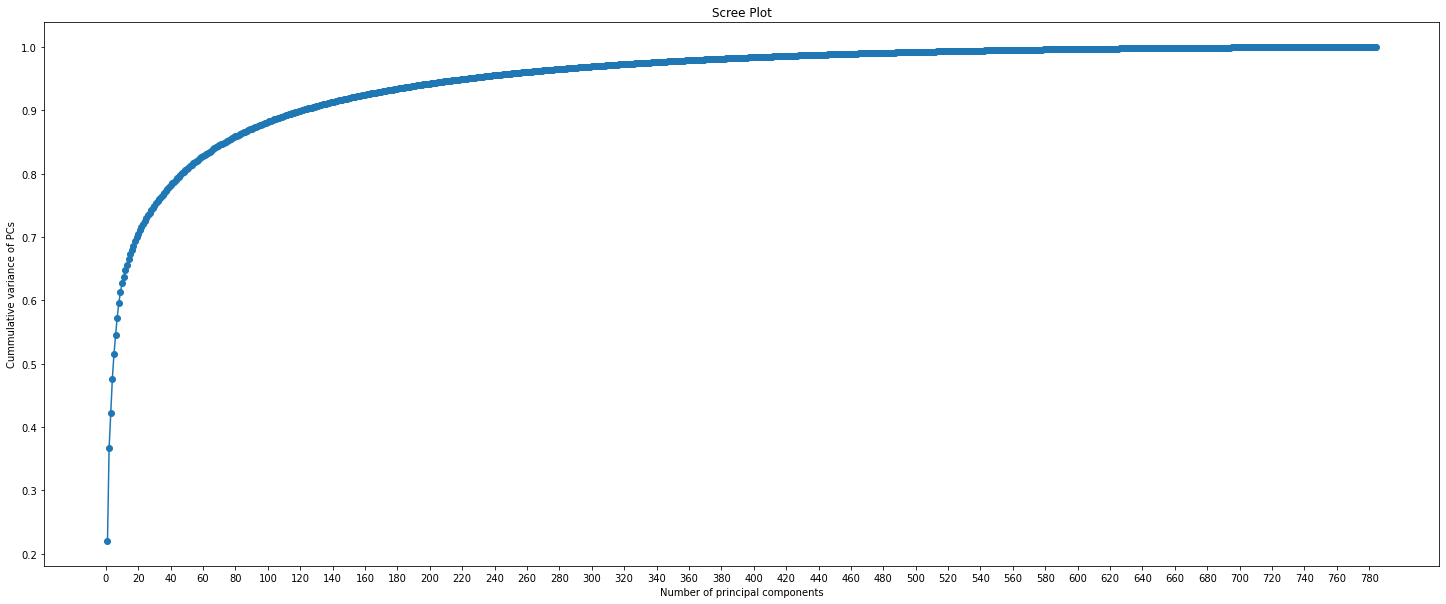

In [5]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


pca= PCA() # Initializing PCA without n_components gives all 784 PCs
X_train_pca = pca.fit(X_train_standardized_df)
X_train_subset_pca = pca.fit(X_train_subset_standardized_df)
explained_variance_ratio = pca.explained_variance_ratio_

cum_var = np.cumsum(explained_variance_ratio)
#print("Cummulative variance of PCs:", cum_var)

plt.figure(figsize=(25,10))
plt.plot(range(1,len(cum_var)+1),cum_var,marker='o', linestyle='-')
plt.title("Scree Plot")
plt.xlabel("Number of principal components")
plt.ylabel("Cummulative variance of PCs")
plt.xticks(range(0,len(cum_var)+1,20))
plt.show()

### Number of Principal Components vs Cummulative variance captured by PCA plot
- From the above plot we can see that the cummulative varaince captured by first 50 Principal Components steadily increases.
- Around 100 PCs, 90% of the variance in the data is captured
- Around 150 PCs, 95% of the variance in the data is captured
- Around 250 PCs, the graph flattens out in capturing more variance from the data.

### PCA with 100 components

In [40]:
pca = PCA(n_components=100,random_state=598)
X_train_pca_100 = pca.fit_transform(X_train_standardized_df)
X_train_subset_pca_100 = pca.fit_transform(X_train_subset_standardized_df)
X_test_pca_100 = pca.transform(X_test_standardized_df)
print("Shape of training data with 100 PCA components:",X_train_pca_100.shape)
print("Shape of training subset with 100 PCA components:",X_train_subset_pca_100.shape)
print("Shape of test data with 100 PCA components:",X_test_pca_100.shape)

Shape of training data with 100 PCA components: (60000, 100)
Shape of training subset with 100 PCA components: (3000, 100)
Shape of test data with 100 PCA components: (10000, 100)


### KMeans - Optimal number of Clusters based on Silhouette score

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_silhouette_score={}
for k in range(2,15):
    kmeans_model = KMeans(n_clusters=k,random_state=598, init='k-means++')
    kmeans_model.fit(X_train_subset_pca_100)
    kmeans_silhouette_score[k] = silhouette_score(X_train_subset_pca_100, kmeans_model.labels_)

kmeans_silhouette_score
#kmeans_test_pred_label = kmeans.predict(X_test_pca_100)

{2: 0.18602672807597953,
 3: 0.17118473214073548,
 4: 0.16827968825461517,
 5: 0.16919841718702622,
 6: 0.16119621145607038,
 7: 0.15681196984010348,
 8: 0.16199161118993052,
 9: 0.15897999478921693,
 10: 0.15470770950491006,
 11: 0.1458360898463596,
 12: 0.1563751297300838,
 13: 0.1432129614976033,
 14: 0.1323133435996368}

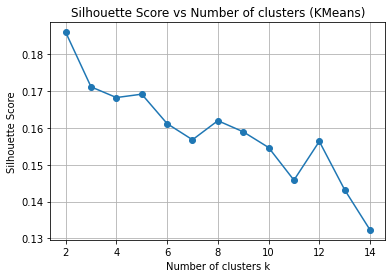

In [46]:
num_of_clusters = kmeans_silhouette_score.keys()
sil_scores = kmeans_silhouette_score.values()
plt.plot(list(num_of_clusters), list(sil_scores), marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of clusters (KMeans)')
plt.grid(True)
plt.show()

- From the silhouette score we can see that the silhouette score ranges between ~0.13 and ~0.18
- The range of score indicates a weak separation in classes.
- KMeans is NOT able to find well-separated clusters in Fashion-MNIST dataset
- Hence **according to silhouette score the optimal number of clusters K = 2 where the separation quality is better**

### KMeans - Optimal number of clusters based on sum of squared distance

{2: 33503031.4202466, 3: 29466486.268934667, 4: 26571707.84486388, 5: 25081494.3119001, 6: 24100198.461869158, 7: 22325772.188242517, 8: 21549484.64356283, 9: 20796105.20268198, 10: 20113337.630098954, 11: 19707057.461972192, 12: 19132990.019232936, 13: 18616806.387583353, 14: 18207141.37944706, 15: 17881464.203041885, 16: 17573453.41473587, 17: 17281840.26516942, 18: 17080899.989462625, 19: 16944272.365715995}


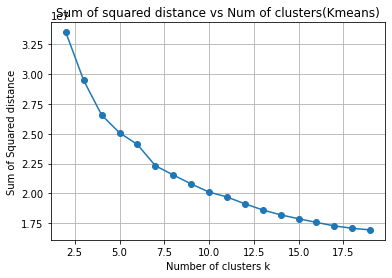

In [47]:
from sklearn.cluster import KMeans
sum_of_sqrd_dist = {}
K_range = range(2, 20)
    
for k in K_range:
    kmeans_model = KMeans(n_clusters=k,random_state=598,init='k-means++')
    kmeans_model.fit(X_train_pca_100)
    sum_of_sqrd_dist[k] = kmeans_model.inertia_

print(sum_of_sqrd_dist)

keys = list(sum_of_sqrd_dist.keys())
values = list(sum_of_sqrd_dist.values())
plt.plot(keys, values, marker='o', linestyle='-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of Squared distance')
plt.title('Sum of squared distance vs Num of clusters(Kmeans)')
plt.grid()
plt.show()

- The sum of squared distances (inertia) decreases as the number of clusters increases, which is expected because adding more clusters always improves the within-cluster fit. 
- The decrease is steep from k = 2 to k = 12, and then begins to flatten out.
- This suggests that increasing the number of clusters beyond 10 does not significantly improve the compactness of the clusters.
- Hence the optimal number of clusters based on sum of squared distances is K=10

### Optimal Number of clusters based on Gap Statistics (KMeans)
- Have just used one-sixth the number of training sample in Gap statistics since the algorithm in the library 'GapStatistics' failed to handle 60000 observations

In [48]:
# !pip install git+https://github.com/Mavengence/GapStatistics.git (Uses Kmeans by default)
from gapstatistics import GapStatistics

gs = GapStatistics()  

# K = max number of clusters to test
# n_iterations = number of reference datasets used
optimal_k_gap = gs.fit_predict(K = 25, X = X_train_pca_100[:len(X_train_subset_pca_100)], n_iterations=20)

print("Optimal number of clusters based on Gap Statistic:", optimal_k_gap)

Optimal number of clusters based on Gap Statistic: 22


### KMeans - Deciding on optimal number of clusters 
- In high-dimensional image data we see the best separation is by broad structures like:
    - Dark objects vs Light objects
    - Footwear vs clothing/Bag
- Hence we see that according to Kmeans silhouette score the optimal number of clusters is 2.
- From the elbow plot we see that the cluster fit does not improve significantly beyond ~10 clusters and hence optimal number of clusters based on SSD = 10.
- Gap statistics resulted in optimal number of clusters to be 22. 
- Even though silhouette analysis prefers k = 2, the dataset contains 10 true classes.
- Using k = 10 allows us to evaluate the dominant label in each cluster and assess whether clustering can recover the true classification in the dataset.

### KMeans clustering based on optimal number of clusters(10)

In [53]:
kmeans_model = KMeans(n_clusters=10,random_state=598, init='k-means++')
kmeans_model.fit(X_train_pca_100)
kmeans_test_pred_labels = kmeans_model.predict(X_test_pca_100)    

### KMeans Clustering Accuracy (Adjusted Rand Index)

In [ ]:
from sklearn.metrics import adjusted_rand_score

ari_kmeans = adjusted_rand_score(Y_test, kmeans_test_pred_labels)
print("Adjusted Rand Index for KMeans clustering:", ari_kmeans)

Adjusted Rand Index for KMeans clustering: 0.30002483171685446


### Dominant label in each cluster (KMeans)

In [55]:
kmeans_labels_df = pd.DataFrame({'True_label':Y_train,'kmeans_train_pred_labels':kmeans_model.labels_})
cluster_label_counts = kmeans_labels_df.groupby("kmeans_train_pred_labels")["True_label"].value_counts()
print(cluster_label_counts)

print(kmeans_labels_df.groupby('kmeans_train_pred_labels')['True_label'].agg(lambda x: x.value_counts().idxmax()))

kmeans_train_pred_labels  True_label
0                         1             5395
                          3             3212
                          0              194
                          4              194
                          6               58
                                        ... 
9                         2              449
                          8              372
                          4              246
                          9              158
                          1              157
Name: count, Length: 78, dtype: int64
kmeans_train_pred_labels
0    1
1    8
2    7
3    9
4    4
5    0
6    9
7    8
8    6
9    5
Name: True_label, dtype: int64


- We can see that dominant label in cluster 0 is 1, cluster 1 is 8 and cluster 2 is 7 etc
- Label 8 is dominant in clusters 1 and 7
- Label 9 is dominant in clusters 3 and 6
- Label 2 and 3 are not dominant in any of the clusters
- Some clusters correspond mostly to one label
- But many clusters have mix of many labels
- Therefore, clustering does not strongly separate Fashion-MNIST classes

### Hierarchical Clustering using Euclidean distance and ward linkage

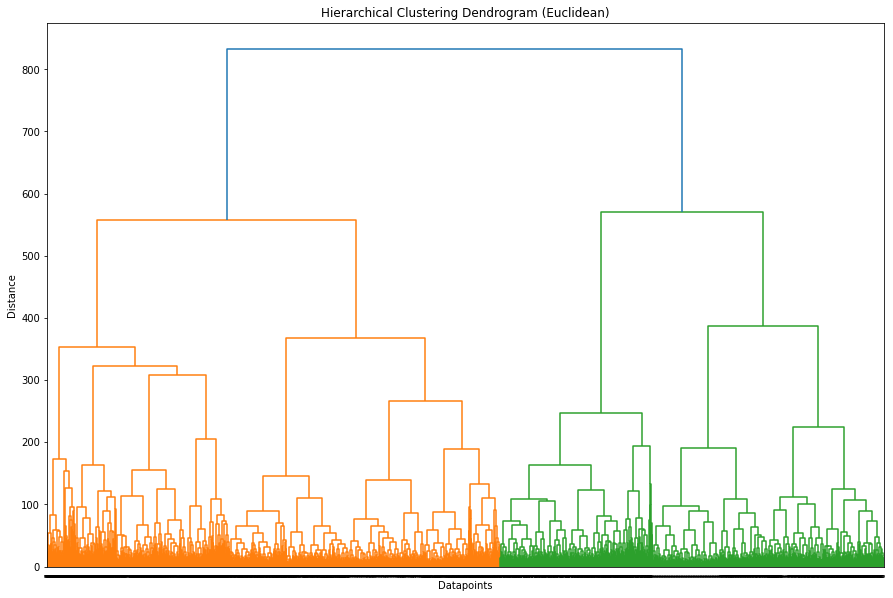

In [68]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform, pdist, cdist

# Pairwise distance
condensed_1d_euclidean_dist = pdist(X_train_subset_pca_100, metric='euclidean')

hierar_model_ecli = linkage(condensed_1d_euclidean_dist, method='ward')
# Plotting dendrogram
plt.figure(figsize=(15,10))
dendrogram(hierar_model_ecli, labels=Y_train_subset.values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Euclidean)")
plt.ylabel("Distance")
plt.xlabel("Datapoints")
plt.show()

### Optimal number of clusters based on Silhouette score (Hierarchical clustering using Euclidean distance)

In [60]:
sil_score_hierar={}
for k in range(2,15):
    labels = fcluster(hierar_model_ecli, k, criterion='maxclust')
    sil_score_hierar[k] = silhouette_score(squareform(condensed_1d_euclidean_dist),labels,metric='precomputed')
print(sil_score_hierar)
optimalk_hierar_sil = max(sil_score_hierar.items(), key=lambda x:x[1])
print("Optimal number of clusters based on Silhouette Score is", optimalk_hierar_sil[0],"with score:", optimalk_hierar_sil[1])

{2: 0.17152324728900797, 3: 0.15251820153027948, 4: 0.1567950217937295, 5: 0.13633840817146342, 6: 0.10839638709294393, 7: 0.11955054869794028, 8: 0.126688095072511, 9: 0.13433898601574315, 10: 0.13655243146341944, 11: 0.13940999459880876, 12: 0.13617390519258069, 13: 0.14146413493626245, 14: 0.14245808422012216}
Optimal number of clusters based on Silhouette Score is 2 with score: 0.17152324728900797


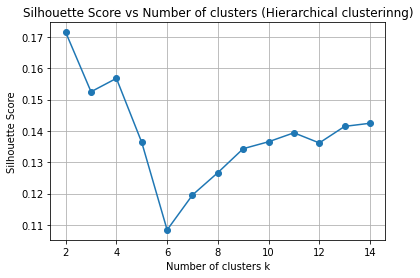

In [61]:
num_of_clusters = sil_score_hierar.keys()
sil_scores = sil_score_hierar.values()
plt.plot(list(num_of_clusters), list(sil_scores), marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of clusters (Hierarchical clusterinng)')
plt.grid(True)
plt.show()

- From the dendogram we can see that we can cut the dendogram at distance ~450
- Since the vertical distance at ~450 distance is large when compared to the previously formed clusters
- When we cut at distance ~450, there will be 4 clusters.
- The silhouette score of hierarchical clustering suggests the optimal number of clusters to be 2 with silhouette score = ~0.17 
- Beyond k = 2, the silhouette score decreases and remains consistently low, suggesting that hierarchical clustering is unable to discover the original 10 classes
- Although silhouette analysis suggests k = 2 as the optimal number of clusters, our goal is class-discovery rather than pure cluster compactness. Since Fashion-MNIST has 10 known classes, we can proceed with k = 10 for interpretability.

### Hierarchical clustering with 10 clusters

In [ ]:
condensed_1d_euclidean_dist = pdist(X_train_subset_pca_100, metric='euclidean')
hierar_model_ecli = linkage(condensed_1d_euclidean_dist, method='ward')
hierar_train_pred_labels = fcluster(hierar_model_ecli,10,criterion='maxclust')

# COMPUTING CENTROIDS FOR EACH OF THE 10 CLUSTERS
# ------------------------------------------------

centroids = []

for c in range(1, 11):
    # indices of samples belonging to cluster c
    idx = np.where(hierar_train_pred_labels == c)[0]
    
    # mean vector (centroid)
    centroid_c = X_train_subset_pca_100[idx].mean(axis=0)
    centroids.append(centroid_c)

centroids = np.array(centroids)   

print("Shape of train data Centroids computed for hierarchical clustering:", centroids.shape)


# ASSIGNING TEST SAMPLES TO NEAREST CENTROID
# ------------------------------------------

# Computing distances from each test point to all 10 centroids
distances = cdist(X_test_pca_100, centroids, metric='euclidean')

# Choosing nearest centroid → cluster label
hierar_test_pred_labels = np.argmin(distances, axis=1) + 1



hierar_test_ari = adjusted_rand_score(Y_test, hierar_test_pred_labels)
print("Adjusted Rand Index for Hierarchical clustering of test data:", hierar_test_ari)

Shape of train data Centroids computed for hierarchical clustering: (10, 100)
Adjusted Rand Index for Hierarchical clustering: 0.3559939002228022


### Dominant label in each cluster (Hierarchical clustering)

In [77]:
hierar_labels_df = pd.DataFrame({'True_label':Y_train_subset,'Hierar_train_pred_labels':hierar_train_pred_labels})
cluster_label_counts = hierar_labels_df.groupby("Hierar_train_pred_labels")["True_label"].value_counts()
print(cluster_label_counts)

print(hierar_labels_df.groupby('Hierar_train_pred_labels')['True_label'].agg(lambda x: x.value_counts().idxmax()))

Hierar_train_pred_labels  True_label
1                         8              98
                          6               2
2                         9             143
                          5               3
3                         9             138
                          5              44
                          7              40
                          8              25
                          6               8
                          0               1
                          2               1
4                         8             146
                          0               1
                          2               1
                          4               1
                          9               1
5                         6             117
                          0              81
                          2              80
                          3              75
                          4              52
                          1            

- From the above results we can see that each cluster has a mix of labels.
- Label 8 is a dominant label in cluster 1 and 4
- Label 9 is a dominant label in cluster 2 and 3
- Label 3 is not dominant in any of the clusters
- Label 6 is a dominant label in cluster 5 and so on.
- Since each cluster is a mix of labels, using hierarchical clustering does not strongly separate Fashion-MNIST classes

### 1. KNN Multiclass Classifier

Hyperparameter Tuning (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
grid_search_knn_model = GridSearchCV(estimator=knn_model,param_grid={'n_neighbors': range(1, 31)},scoring='accuracy',cv=5)
grid_search_knn_model.fit(X_train_subset_standardized_df,Y_train_subset)

Y_pred_train = grid_search_knn_model.predict(X_train_subset_standardized_df)
Y_pred_test = grid_search_knn_model.predict(X_test_standardized_df)

train_accuracy = accuracy_score(Y_train_subset, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

print("Best parameters =", grid_search_knn_model.best_params_) #_['n_neighbors'])
print(f"KNN Train Accuracy: {train_accuracy}")
print(f"KNN Test Accuracy: {test_accuracy}")


Best parameters = {'n_neighbors': 6}
KNN Train Accuracy: 0.8633333333333333
KNN Test Accuracy: 0.804


### Confusion matrix (KNN)

In [42]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
cm_knn = confusion_matrix(Y_test,Y_pred_test)
cm_knn_df = pd.DataFrame(cm_knn, index=class_names, columns=class_names)
cm_knn_df

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,831,0,18,34,9,0,98,1,8,1
Trouser,14,942,13,21,1,0,9,0,0,0
Pullover,28,0,704,5,150,0,105,0,8,0
Dress,46,18,13,864,32,0,27,0,0,0
Coat,4,2,112,51,742,0,84,0,5,0
Sandal,2,0,5,3,5,736,23,156,2,68
Shirt,213,1,115,30,119,2,506,0,13,1
Sneaker,0,0,0,0,0,17,2,934,0,47
Bag,13,1,12,11,10,3,57,25,866,2
Ankle boot,0,0,0,0,0,10,2,73,0,915


### Per Class Accuracy(Recall) of KNN
- Recall = True Positives for Class i / Total samples of True Class i 

In [8]:
per_class_accuracy_KNN = cm_knn.diagonal()/ (cm_knn.sum(axis=1))
print(per_class_accuracy_KNN)

print("True cluster - Class name - Accuracy")
for index,acc in enumerate(per_class_accuracy_KNN):
    print(index,"-",class_names[index],"-",acc)
    

[0.831 0.942 0.704 0.864 0.742 0.736 0.506 0.934 0.866 0.915]
True cluster - Class name - Accuracy
0 - T-shirt/top - 0.831
1 - Trouser - 0.942
2 - Pullover - 0.704
3 - Dress - 0.864
4 - Coat - 0.742
5 - Sandal - 0.736
6 - Shirt - 0.506
7 - Sneaker - 0.934
8 - Bag - 0.866
9 - Ankle boot - 0.915


- From the above per class accuracy we can see that
    - **Class 2(Trouser) and Class 7(Sneaker) are the classes that have high classification accuracy on the test data**
    - Class 6(Shirt) has the least classification accuracy
    - From the **confusion matrix** we can see that **Class 6(Shirt) is mostly misclassified** as
        - Class 0 (T-Shirt/Top) or
        - Class 2 (Pullover) or
        - Class 4 (Coat)

### Classification Report of KNN

In [8]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.72      0.83      0.77      1000
     Trouser       0.98      0.94      0.96      1000
    Pullover       0.71      0.70      0.71      1000
       Dress       0.85      0.86      0.86      1000
        Coat       0.69      0.74      0.72      1000
      Sandal       0.96      0.74      0.83      1000
       Shirt       0.55      0.51      0.53      1000
     Sneaker       0.79      0.93      0.85      1000
         Bag       0.96      0.87      0.91      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



### Classification report interpretation (KNN)
- **Example Sandal**
    - **Precison:** Of all images the model predicted as Sandal, 96% were actually Sandals.
        - **High Precison** - when it predicts Sandal model is almost always correct
    - **Recall:** Out of all the true Sandal images, 74% of the images were correctly classified as Sandals 
        - **Low recall** - This is because Sandals are sometimes misclassified as Sneakers / Ankle boot
        - Confusion matrix Row of Sandal - [[  2   0   5   3   5 736  23 156   2  68]]
    - **F1 score:** Harmonic mean of Precision and Recall
        - The F1-score 0.83 means the model does a good overall job on the Sandal class, but the performance is slightly less due to lower recall. It finds many sandals correctly, but misses some of them.
- **Overall Accuracy of KNN**
    - Out of the 10,000 test images, the model correctly predicted 80% of them.
    - That is the model achieves 80% accuracy on Fashion-MNIST.
    - On average, across the 10 classes, the model’s precision, recall, and F1-score are around 0.80

### 2. Random Forest Multiclass Classifier
### Cross Validation using RandomizedSearchCV

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 100),  
    'min_samples_split': randint(5, 11),
    'max_depth': [None, 20,30],
    'max_features': ['sqrt', 'log2']
}
rf_model = RandomForestClassifier(random_state=598)
rf_randomseachcv = RandomizedSearchCV(estimator=rf_model,param_distributions=param_dist,cv=3,n_iter=10,random_state=598,scoring='accuracy')
rf_randomseachcv.fit(X_train_subset,Y_train_subset)

Y_rf_train_pred_labels = rf_randomseachcv.predict(X_train_subset)
Y_rf_test_pred_labels = rf_randomseachcv.predict(X_test)

print(f"Best parameters found: {rf_randomseachcv.best_params_}")
print("Randomforest CV Train Accuracy:", accuracy_score(Y_train_subset,Y_rf_train_pred_labels))
print("Randomforest CV Test Accuracy:", accuracy_score(Y_test,Y_rf_test_pred_labels))

Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 97}
Randomforest CV Train Accuracy: 0.9986666666666667
Randomforest CV Test Accuracy: 0.8357


### Random Forest model fitting based on tuned hyper parameters

In [150]:
rf_model = RandomForestClassifier(n_estimators=97, max_depth=20, max_features='sqrt', min_samples_split=5)
rf_model.fit(X_train_subset,Y_train_subset)
rf_model.predict(X_test)

Y_rf_train_pred_labels = rf_model.predict(X_train_subset)
Y_rf_test_pred_labels = rf_model.predict(X_test)

print("Randomforest Train Accuracy:", accuracy_score(Y_train_subset,Y_rf_train_pred_labels))
print("Randomforest Test Accuracy:", accuracy_score(Y_test,Y_rf_test_pred_labels))
faeture_imp_df = pd.DataFrame({'Feature':X_train_subset.columns,'Feature_Importance':rf_model.feature_importances_})
faeture_imp_df.nlargest(n=10,columns=['Feature_Importance'])

Randomforest Train Accuracy: 0.999
Randomforest Test Accuracy: 0.8353


,Feature,Feature_Importance
490,pixel491,0.008826
630,pixel631,0.008805
602,pixel603,0.008347
574,pixel575,0.007639
406,pixel407,0.007482
234,pixel235,0.007183
546,pixel547,0.007032
207,pixel208,0.006986
434,pixel435,0.006465
599,pixel600,0.006143


- Train accuracy is 0.99 and Test data classification accuracy is 0.8353
- This indicates that the random forest model is slightly overfitting on the training data
- And the most important features that were used for classifiaction were in the range of ~490 and ~600

### Confusion matrix of Random Forest

In [157]:
cm_rf = confusion_matrix(Y_test,Y_rf_test_pred_labels)
cm_rf_df = pd.DataFrame(cm_rf, index=class_names, columns=class_names)

print("Confusion Matrix:")
cm_rf_df

Confusion Matrix:


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,791,2,20,63,0,2,105,1,16,0
Trouser,3,941,17,32,1,1,4,0,1,0
Pullover,10,3,744,6,153,1,70,0,13,0
Dress,22,10,13,913,21,0,20,0,1,0
Coat,0,3,67,58,828,1,39,0,4,0
Sandal,0,0,0,1,0,893,0,63,7,36
Shirt,188,2,107,39,160,0,481,0,23,0
Sneaker,0,0,0,0,0,38,0,896,0,66
Bag,0,2,7,5,2,5,18,4,956,1
Ankle boot,0,0,0,0,0,14,1,68,3,914


### Classification report of Random Forest

In [164]:
print(classification_report(Y_test,Y_rf_test_pred_labels,target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.79      0.79      1000
     Trouser       0.98      0.94      0.96      1000
    Pullover       0.76      0.74      0.75      1000
       Dress       0.82      0.91      0.86      1000
        Coat       0.71      0.83      0.76      1000
      Sandal       0.94      0.89      0.91      1000
       Shirt       0.65      0.48      0.55      1000
     Sneaker       0.87      0.90      0.88      1000
         Bag       0.93      0.96      0.94      1000
  Ankle boot       0.90      0.91      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.83      0.84      0.83     10000



- Overall Performance of Random forest
    - Good classification accuracy is for the classes
        - Trouser (0.96 F1)
        - Sandal (0.91 F1)
        - Bag (0.94 F1)
        - Ankle boot (0.91 F1)
    - Moderate classification accuracy is for the classes
        - T-shirt/top (0.79 F1)
        - Pullover (0.75 F1)
        - Dress (0.86 F1)
        - Coat (0.76 F1)
    - Poor classification accuracy is for the classes
        - The class shirt is mostly misclassified as T-shirt/Pullover/Coat
- Overall, 84% accuracy is strong for a classification by Random Forest on raw pixel data.
- The model performs well on distinct items but struggles with similar clothing types, like Shirts,T-shirts Pullover and Coat.
- Random forest accuracy is slightly better than KNN which had a overall accuracy of 80%

### XGBoost classification
- Hyperparameter tuning (XGBoost)

In [179]:
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(4, 8),
    'learning_rate': uniform(0.05, 0.15),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'min_child_weight': randint(1, 6),
    'gamma': uniform(0, 0.3)
}

xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=10,
    eval_metric='mlogloss',
    random_state=598
)

xgb_random_model = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,        
    cv=3,
    scoring='accuracy',
    random_state=598,
    verbose=1
)

xgb_random_model.fit(X_train_subset, Y_train_subset)
best_xgb = xgb_random_model.best_estimator_

print("Best XGBoost parameters:")
print(xgb_random_model.best_params_)
print("Best CV accuracy:", xgb_random_model.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGBoost parameters:
{'colsample_bytree': 0.9395255403374658, 'gamma': 0.20700748481091855, 'learning_rate': 0.15636411655939525, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 139, 'subsample': 0.7011789511320827}
Best CV accuracy: 0.8403333333333333


### Fitting the XGBoost model with the best parameters obtained by tuning

In [180]:
Y_train_pred_xg = best_xgb.predict(X_train_subset)
Y_test_pred_xg = best_xgb.predict(X_test)

print("XGBoost Train Accuracy:", accuracy_score(Y_train_subset, Y_train_pred_xg))
print("XGBoost Test Accuracy:", accuracy_score(Y_test, Y_test_pred_xg))

print(classification_report(Y_test, Y_test_pred_xg))

XGBoost Train Accuracy: 1.0
XGBoost Test Accuracy: 0.8499
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1000
           1       0.98      0.95      0.96      1000
           2       0.76      0.76      0.76      1000
           3       0.85      0.90      0.87      1000
           4       0.77      0.82      0.79      1000
           5       0.96      0.89      0.93      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.91      0.90      1000
           8       0.94      0.95      0.94      1000
           9       0.90      0.93      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



- From the classification report of XGBoost we can still see that
    - Classwise performance
        - The **class shirt has many misclassifications with f1-score of 0.61**, which still remains the most misclassified class. 
        - But there is slightly improvement when compared to Random Forest(f1-score of 0.55) and KNN(f1-score of 0.53).
    - Overall Model Performance
        - XGBoost performs moderately well across the remaining classes, achieving strong precision and recall for categories such as Trouser, Bag, Sandal, and Ankle Boot.
        - Despite extensive hyperparameter tuning, XGBoost achieved only marginal improvements over Random Forest
        - The overall accuracy in multiclass classification using XGBoost is 0.85 which is marginal improvement when compared to KNN(0.80) and Randomforest(0.83).

### 4. SVM Classifier (RBF kernel)

In [36]:
from sklearn.svm import SVC

# Parameter grid for RBF kernel
param_grid = {
    'C': [0.05, 0.1, 0.5, 1, 5, 8, 10],
    'gamma': ['scale', 0.01, 0.1, 1]  
}

SVM_rbf_model = SVC(kernel='rbf', random_state=598)

# Hyperparameter tuning
grid = GridSearchCV(
    SVM_rbf_model,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1  
)

# Fitting model
grid.fit(X_train_subset_pca_100, Y_train_subset)

# Print best hyperparameters and CV accuracy
print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)


Best params: {'C': 10, 'gamma': 'scale'}
Best CV accuracy: 0.843


### Fitting the SVM model based on tuned parameter 'C'

In [37]:
SVM_rbf_model = SVC(kernel='rbf', random_state=598, C=10, gamma = 'scale')

SVM_rbf_model.fit(X_train_subset_pca_100, Y_train_subset)
Y_train_pred_svm = SVM_rbf_model.predict(X_train_subset_pca_100)
Y_test_pred_svm = SVM_rbf_model.predict(X_test_pca_100)

print("SVM Linear model Train Accuracy:", accuracy_score(Y_train_subset, Y_train_pred_svm))
print("SVM Linear model Test Accuracy:", accuracy_score(Y_test, Y_test_pred_svm))


SVM Linear model Train Accuracy: 0.979
SVM Linear model Test Accuracy: 0.8464


### Confusion Matrix (SVM Classifier)

In [38]:
cm_svm = confusion_matrix(Y_test,Y_test_pred_svm)
cm_svm_df = pd.DataFrame(cm_svm, index=class_names, columns=class_names)

print("Confusion Matrix:")
cm_svm_df

Confusion Matrix:


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,795,2,20,48,2,2,108,1,21,1
Trouser,9,959,7,24,0,0,0,0,1,0
Pullover,26,1,757,10,105,1,84,0,16,0
Dress,32,8,17,898,22,0,21,0,2,0
Coat,1,0,77,41,798,0,77,0,6,0
Sandal,2,0,0,2,0,890,1,69,9,27
Shirt,154,2,99,39,82,0,594,0,30,0
Sneaker,0,0,0,0,0,31,0,923,1,45
Bag,4,0,11,5,4,3,17,9,945,2
Ankle boot,0,0,0,0,0,20,0,52,23,905


### Classification Report (SVM)

In [39]:
print(classification_report(Y_test, Y_test_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1000
           1       0.99      0.96      0.97      1000
           2       0.77      0.76      0.76      1000
           3       0.84      0.90      0.87      1000
           4       0.79      0.80      0.79      1000
           5       0.94      0.89      0.91      1000
           6       0.66      0.59      0.62      1000
           7       0.88      0.92      0.90      1000
           8       0.90      0.94      0.92      1000
           9       0.92      0.91      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### Performance of SVM RBF classifier
- High-performing classes:
    - Trouser (class 1): F1 = 0.97, showing the model easily distinguishes trousers.
    - Bag (class 8) and Ankle boot (class 9): F1 ~ 0.91, indicating these classes are also well-classified.
    - Sneaker (class 7) and Sandal (class 5): F1 ~ 0.90, good performance for these footwear classes.
- Moderate-performing classes:
    - T-shirt/top (class 0), Dress (class 3), Coat (class 4), Pullover (class 2): F1 ranges 0.76–0.87.
- Challenging class:
    - Shirt (class 6): F1 = 0.62, lowest among all classes. The model struggles to distinguish Shirts from visually similar items like T-shirts or Pullovers, but the classification is better than other models

### Summary of all the classification models

| Model          | Train Accuracy | Test Accuracy | Macro F1-score |
|----------------|----------------|---------------|----------------|
| KNN            | 0.8633         | 0.8040        | 0.80           |
| Random Forest  | 0.9990         | 0.8353        | 0.83           |
| XGBoost        | 1.0000         | 0.8499        | 0.85           |
| SVM (RBF)      | 0.9779         | 0.8500        | 0.85           |



### Overall Observations:
- XGBoost and SVM RBF kernel achieved the highest F1-scores for most classes, with an overall test accuracy of ~85%.
- Random Forest performed slightly lower than XGBoost and SVM RBF kernel, with strong results for classes like Sandal, Bag, and Ankle boot, and a test accuracy of ~83.53%.
- KNN had the lowest overall test accuracy (80.4%) and F1-scores.
- All the models had low accuracy in classifying the item Shirt, which was mostly misclassified as T-shirt/Pullover/Coat

### Classwise Performance Accuracy
| Class         | KNN F1  | Random Forest F1 | XGBoost F1 | SVM RBF F1 |
|---------------|---------|-----------------|------------|------------|
| T-shirt/top   | 0.77    | 0.79            | 0.81       | 0.79       |
| Trouser       | 0.96    | 0.96            | 0.96       | 0.97       |
| Pullover      | 0.71    | 0.75            | 0.76       | 0.76       |
| Dress         | 0.86    | 0.86            | 0.87       | 0.87       |
| Coat          | 0.72    | 0.76            | 0.79       | 0.79       |
| Sandal        | 0.83    | 0.91            | 0.93       | 0.91       |
| Shirt         | 0.53    | 0.55            | 0.61       | 0.62       |
| Sneaker       | 0.85    | 0.88            | 0.90       | 0.90       |
| Bag           | 0.91    | 0.94            | 0.94       | 0.92       |
| Ankle boot    | 0.90    | 0.91            | 0.91       | 0.91       |


### Class-specific Insights:
- Best-performing classes across all models:
    - Trouser consistently achieved F1 ~0.96 across all models, indicating that this class is easily distinguishable.
    - Bag and Ankle boot also achieved high F1-scores (>0.90) across all models.
- Challenging classes:
    - Shirt had the lowest F1-scores (0.53–0.62), suggesting these images are more difficult to classify correctly.
    - Pullover and Coat also showed lower F1-scores, highlighting some overlap in visual features.

### Conclusion
- The unsupervised learning algorithms like KMeans and Hierarchical clustering did not perform well in classiying the Fashion-MNIST dataset, since each cluster has several mix of classes.
- XGBoost and SVM(RBF) provided the best overall performance on Fashion-MNIST, in classifying most of the classes accurately with an overall performance of ~85%. 
- Random Forest is a strong alternative with slightly lower accuracy(~83%), while KNN is simpler, performs well for obvious categories but moderately well for more ambiguous categories with overall accuracy of  ~80%.